# Market Indices


In [1]:
#!/usr/bin/env python3.8.10
import sys
import datetime
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import pandas_market_calendars as mcal
sys.path.append('../lib/')
from functions import *

In [2]:
# Stok indices
# Retrieve financial data for indices from "https://finance.yahoo.com/world-indices"
# ^GSPC: Standard and Poor's 500
# ^DJI: Dow Jones Industrial Index
# ^IXIC: NASDAQ_Composite
# ^RUT: Russel 2000
# S&P 500 (^SPX) options: https://finance.yahoo.com/quote/%5ESPX/options?p=%5ESPX

In [3]:
# Set start date
start = date.today() - datetime.timedelta(weeks=52)
# Set end date
end = date.today()

# To evaluate the difference between the dates in terms of business days.
print(f'Days between dates: {(end - start).days} days')

nyse = mcal.get_calendar('NYSE')
bizdays = nyse.valid_days(start_date=start, end_date=end)

print(f'Business days between dates: {len(bizdays)} days')

Days between dates: 364 days
Business days between dates: 254 days


In [4]:
# We concentrate on the Standard and Poor's 500 Index
GSPC_df = read_data_from_yahoo('^GSPC', start, end)
GSPC_df['Date'] = pd.to_datetime(GSPC_df['Date'],
                                 format='%Y-%m-%d').dt.strftime('%d-%m-%Y')

# rate of return
r = GSPC_df['Adj Close'].diff(periods=1) / GSPC_df['Adj Close'].to_numpy()
GSPC_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,09-04-2021,4129.479980,4095.510010,4096.109863,4128.799805,3634910000,4128.799805
1,12-04-2021,4131.759766,4114.819824,4124.709961,4127.990234,3578500000,4127.990234
2,13-04-2021,4148.000000,4124.430176,4130.100098,4141.589844,3728440000,4141.589844
3,14-04-2021,4151.689941,4120.870117,4141.580078,4124.660156,3976540000,4124.660156
4,15-04-2021,4173.490234,4139.759766,4139.759766,4170.419922,4027680000,4170.419922
...,...,...,...,...,...,...,...
249,04-04-2022,4583.500000,4539.209961,4547.970215,4582.640137,3833500000,4582.640137
250,05-04-2022,4593.450195,4514.169922,4572.450195,4525.120117,3906230000,4525.120117
251,06-04-2022,4503.939941,4450.040039,4494.169922,4481.149902,4137080000,4481.149902
252,07-04-2022,4521.160156,4450.299805,4474.649902,4500.209961,4054010000,4500.209961


We concentrate on the Standard and Poor's 500 Index.
<br> In case, we also remove the last row, which appears to be essentially a repetition of the penultimate row.

In [5]:
# Compute the logarithm return for each index dataframe
GSPC_df = log_return(GSPC_df)

GSPC_df

,Date,High,Low,Open,Close,Volume,Adj Close,y_lr,y_plr
0,12-04-2021,4131.759766,4114.819824,4124.709961,4127.990234,3578500000,4127.990234,-0.000196,-0.019610
1,13-04-2021,4148.000000,4124.430176,4130.100098,4141.589844,3728440000,4141.589844,0.003289,0.328907
2,14-04-2021,4151.689941,4120.870117,4141.580078,4124.660156,3976540000,4124.660156,-0.004096,-0.409610
3,15-04-2021,4173.490234,4139.759766,4139.759766,4170.419922,4027680000,4170.419922,0.011033,1.103310
4,16-04-2021,4191.310059,4170.750000,4174.140137,4185.470215,4157430000,4185.470215,0.003602,0.360232
...,...,...,...,...,...,...,...,...,...
248,04-04-2022,4583.500000,4539.209961,4547.970215,4582.640137,3833500000,4582.640137,0.008058,0.805838
249,05-04-2022,4593.450195,4514.169922,4572.450195,4525.120117,3906230000,4525.120117,-0.012631,-1.263116
250,06-04-2022,4503.939941,4450.040039,4494.169922,4481.149902,4137080000,4481.149902,-0.009764,-0.976443
251,07-04-2022,4521.160156,4450.299805,4474.649902,4500.209961,4054010000,4500.209961,0.004244,0.424437


Intercept: 4243.60172086354, Index: 1.4703291856979912


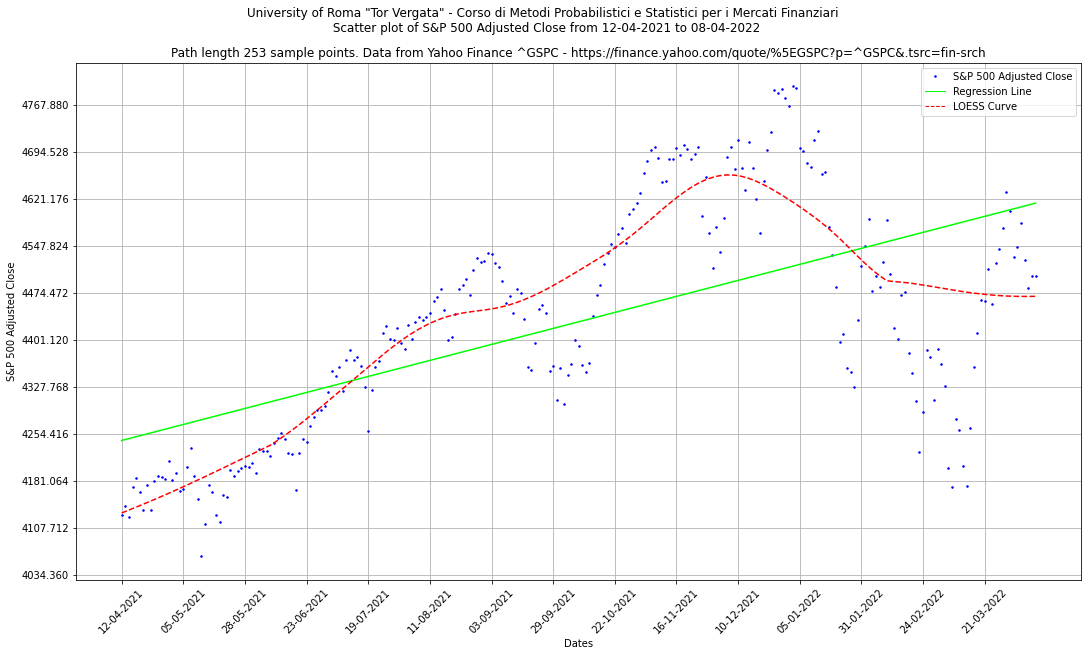

In [6]:
# Hence, we plot the GSPC adjusted close
link = "https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC&.tsrc=fin-srch"
data_visualization(GSPC_df, kind='scatter', symbol='^GSPC',
                   link=link, column='Adj Close')

Intercept: 4243.60172086354, Index: 1.4703291856979912


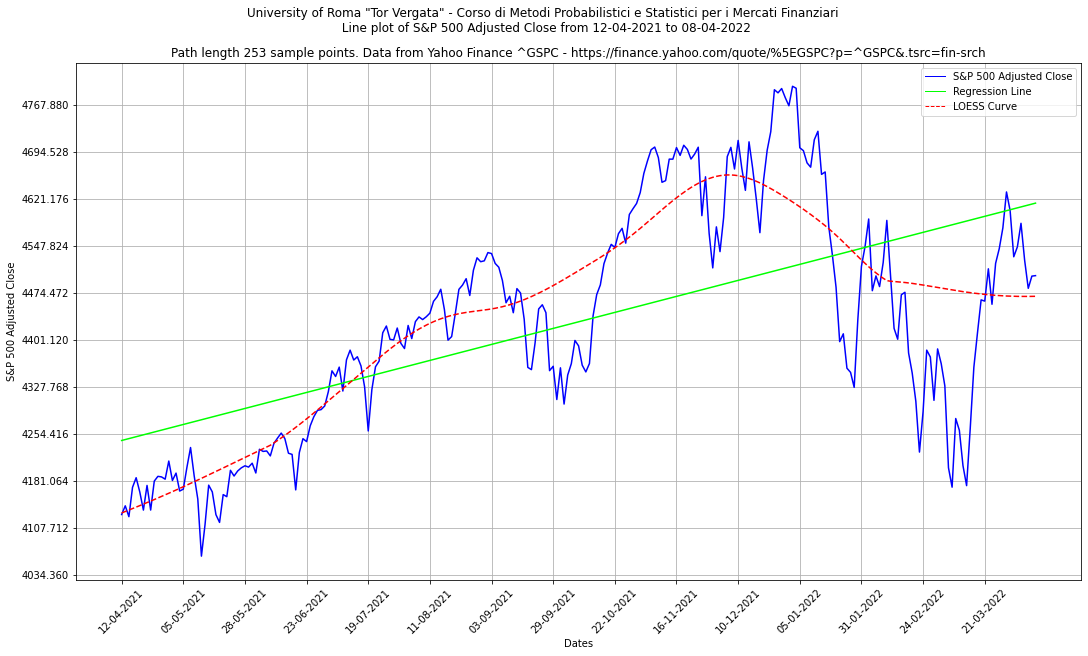

In [7]:
data_visualization(GSPC_df, kind='line', symbol='^GSPC',
                   link=link, column='Adj Close')

Intercept: 0.09558631999177514, Index: -0.0004878964211257842


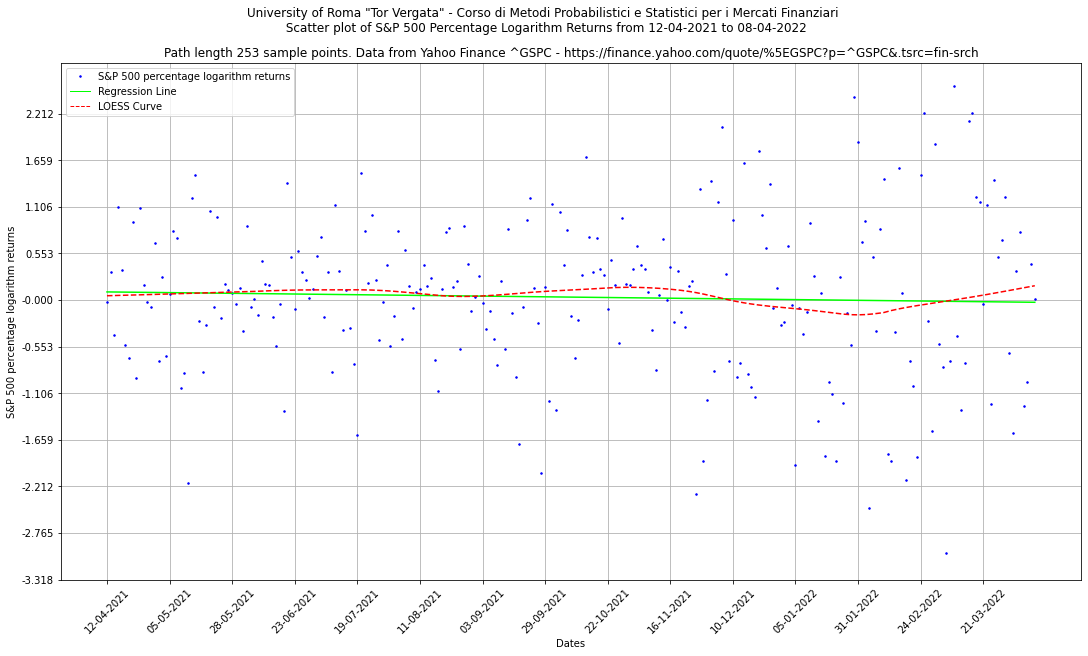

In [8]:
data_visualization(GSPC_df, kind='scatter', symbol='^GSPC',
                   link=link, column='y_plr')

Intercept: 0.09558631999177514, Index: -0.0004878964211257842


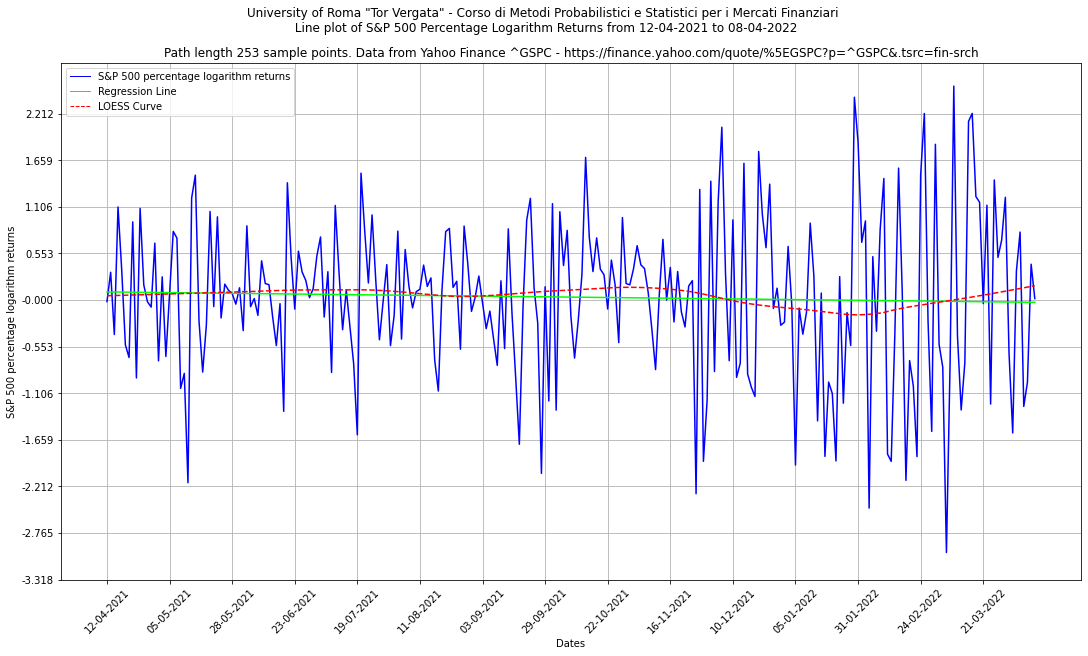

In [9]:
data_visualization(GSPC_df, kind='line', symbol='^GSPC',
                   link=link, column='y_plr')

Autocorrelogram

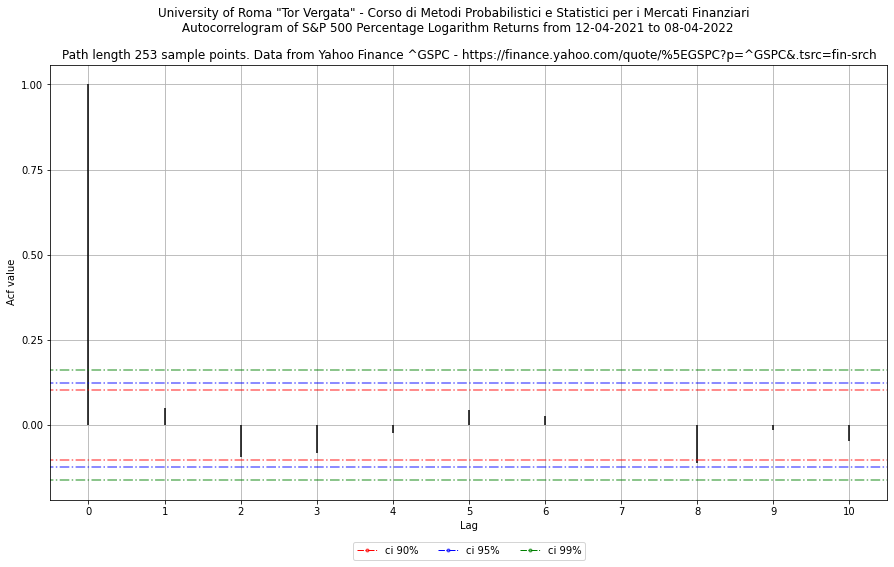

In [10]:
autocorrelogram(GSPC_df, link=link, symbol='^GSPC')

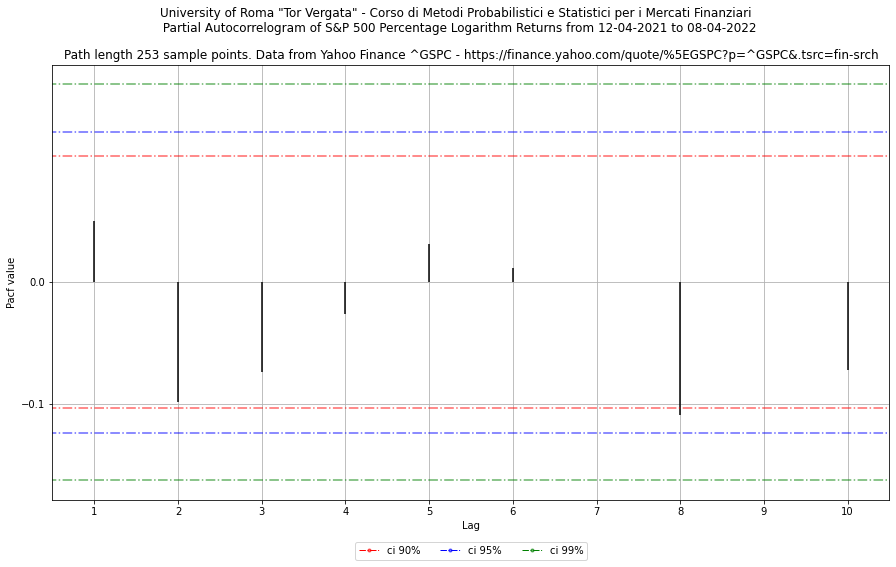

In [11]:
autocorrelogram(GSPC_df, partial=True, link=link, symbol='^GSPC')

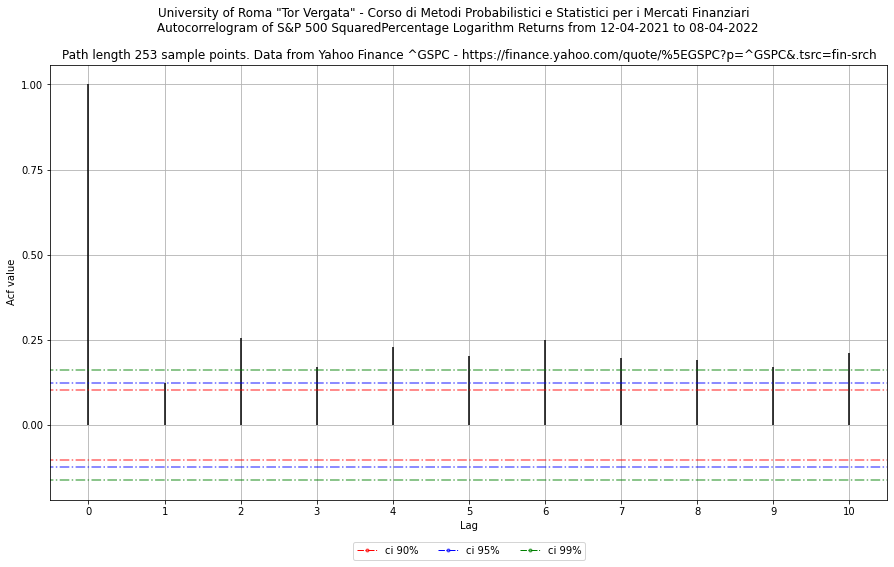

In [12]:
autocorrelogram(GSPC_df, link=link, squared=True, symbol='^GSPC')

In [13]:
import yahoo_fin.options as ops

date = '07/15/2022' # in the format 'mm/dd/yyyy'
df_calls = ops.get_calls(ticker='^spx', date=date)
df_puts = ops.get_puts(ticker="^spx", date=date)

df_puts['Last Trade Date'] = pd.to_datetime(df_puts['Last Trade Date'])
df_calls['Last Trade Date'] = pd.to_datetime(df_calls['Last Trade Date'])


/home/manuel/.local/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [14]:
puts_sorted = df_puts.sort_values(by='Last Trade Date', ascending=False)
calls_sorted = df_calls.sort_values(by='Last Trade Date', ascending=False)

In [15]:
df_calls.sort_values(by='Last Trade Date', ascending=False)

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
153,SPX220715C04790000,2022-04-08 14:55:00,4790.0,40.61,39.7,40.3,-1.46,-3.47%,311,759,14.55%
118,SPX220715C04500000,2022-04-08 14:53:00,4500.0,177.50,175.7,176.4,-11.13,-5.90%,353,4377,18.92%
154,SPX220715C04800000,2022-04-08 14:52:00,4800.0,37.70,36.9,37.5,-6.80,-15.28%,16,6687,14.41%
161,SPXW220715C04860000,2022-04-08 14:50:00,4860.0,25.20,25.0,25.5,-6.90,-21.50%,20,43,14.02%
58,SPXW220715C04000000,2022-04-08 14:35:00,4000.0,554.07,558.0,565.2,20.06,+3.76%,1,13,26.83%
...,...,...,...,...,...,...,...,...,...,...,...
3,SPX220715C01000000,2021-11-10 07:50:00,1000.0,3360.83,0.0,0.0,0.00,-,1,1,0.00%
14,SPX220715C03425000,2021-11-10 07:50:00,3425.0,975.19,0.0,0.0,0.00,-,5,5,0.00%
21,SPX220715C03625000,2021-11-10 07:50:00,3625.0,893.89,0.0,0.0,0.00,-,2,1,0.00%
12,SPX220715C03375000,2021-11-10 07:50:00,3375.0,1088.11,0.0,0.0,0.00,-,-,1,0.00%


Intercept: 0.000969670398027706, Index: -5.303777449235043e-06


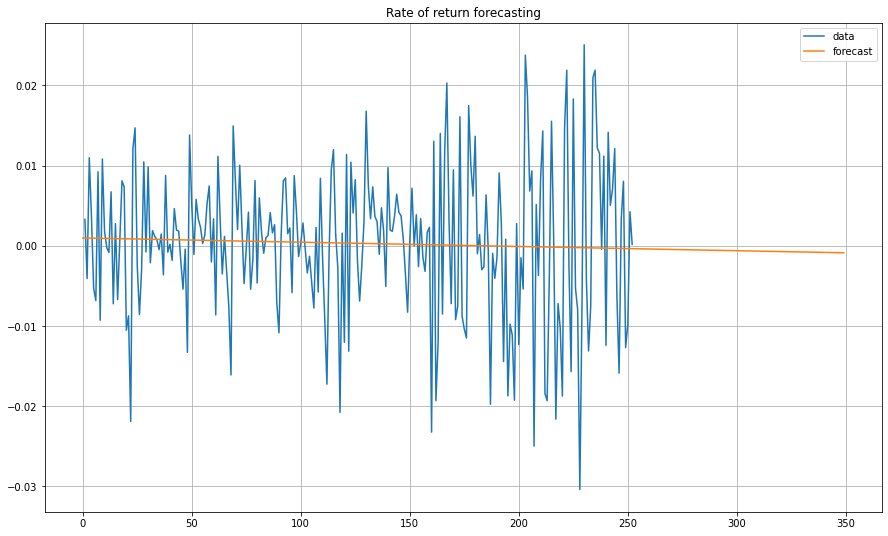

In [16]:
# Days left to 15/07/2022, from now
days_left = (datetime.date(2022, 7, 15) - end).days

x = GSPC_df.index.to_numpy()[1:]
y = r[2:]
r_forecast = linear_regression(x=x, y=y, offset=len(x) + days_left)

plt.figure(figsize=(15, 9))
plt.plot(GSPC_df.index.to_numpy()[1:], r[2:], label='data')
plt.plot(r_forecast[1:], label='forecast')
plt.title('Rate of return forecasting')
plt.legend()
plt.grid()

Intercept: 4243.60172086354, Index: 1.4703291856979912


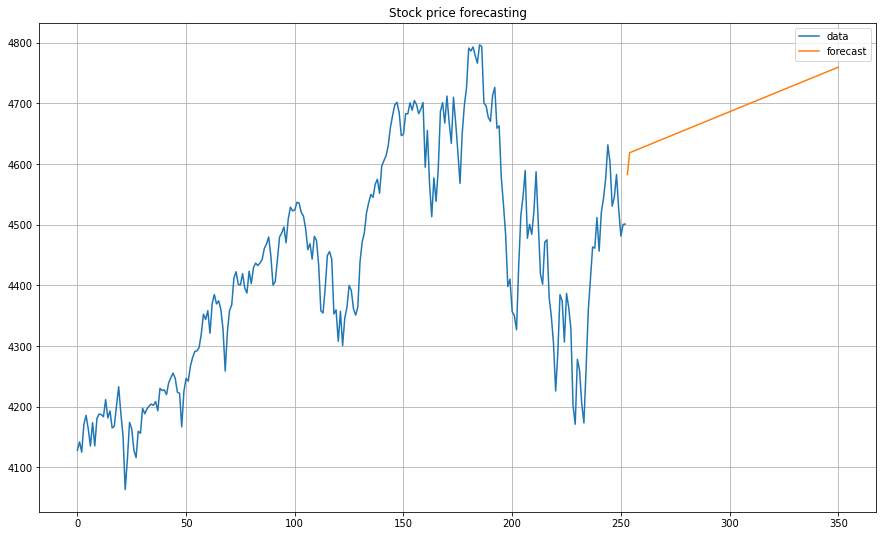

In [17]:
x = GSPC_df.index.to_numpy()
y = GSPC_df['Adj Close'].to_numpy()
n = len(x)
adj_forecast = linear_regression(x=x, y=y, offset=n + days_left)
S0 = GSPC_df.loc[GSPC_df.Date == '04-04-2022', 'Adj Close'].to_numpy()
ST = adj_forecast[-days_left + 1:]
S = np.concatenate((S0, ST))

plt.figure(figsize=(15, 9))
plt.plot(x, y, label='data')
plt.plot(range(n, n + len(S)), S, label='forecast')
plt.title('Stock price forecasting')
plt.legend()
plt.grid()

418.9483923169755
Intercept: 455.53311312087294, Index: 1.4939018150819483
-211.61069397463962
Intercept: -174.48936097248196, Index: 1.4942475703643305


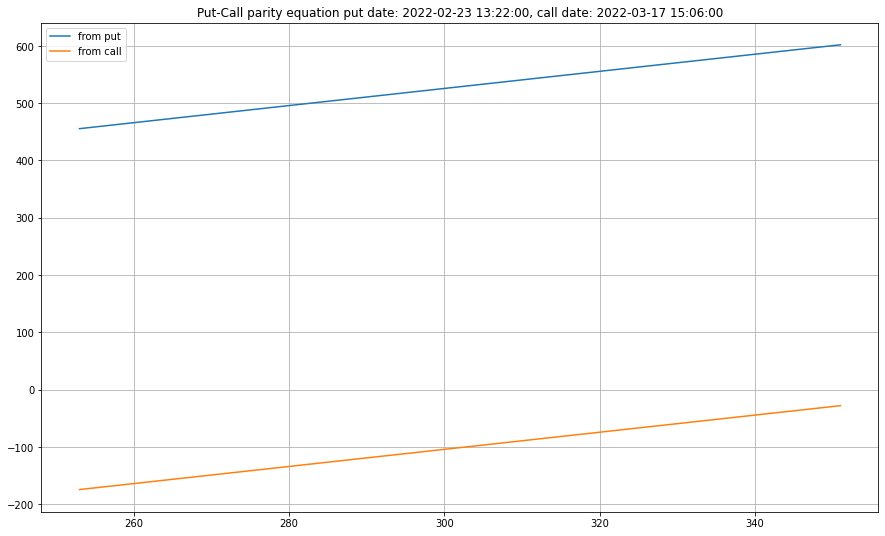

1630.0221929722993
Intercept: 1665.5762776493802, Index: 1.4932377454126058
78.64666320721517
Intercept: 115.52098424509413, Index: 1.4940884131708525


<Figure size 432x288 with 0 Axes>

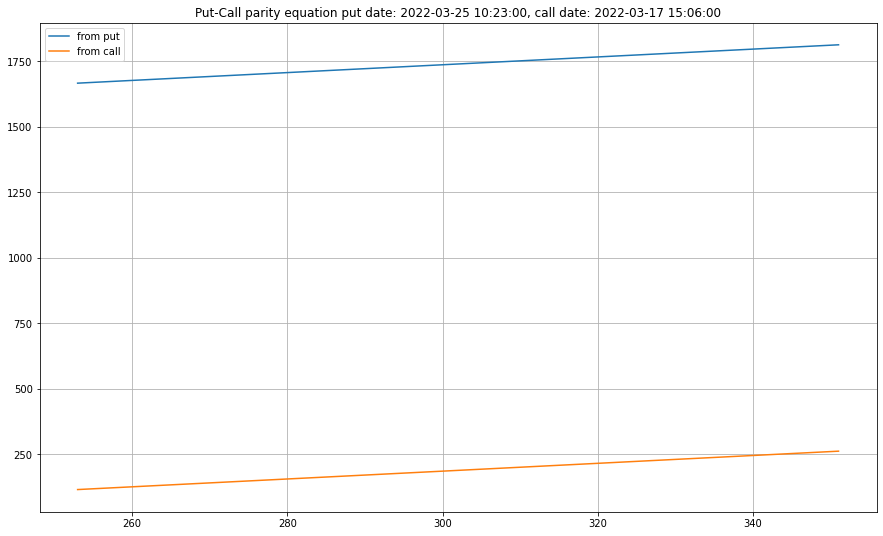

1930.288424539735
Intercept: 1965.5869795985968, Index: 1.4930731000400426
-221.6195683602209
Intercept: -184.48971770412257, Index: 1.4942530585434173


<Figure size 432x288 with 0 Axes>

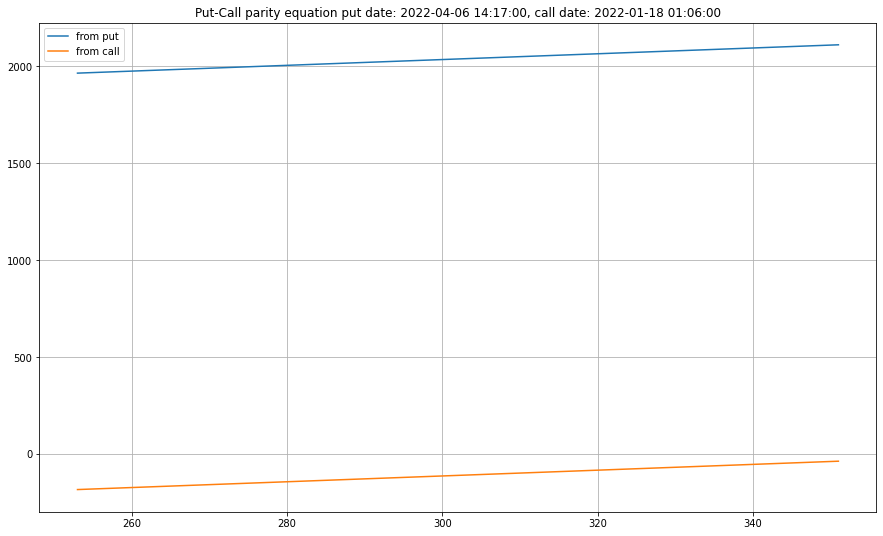

1454.8668912246285
Intercept: 1490.5700348456708, Index: 1.4933337885466011
-281.67281467370776
Intercept: -244.49185809396585, Index: 1.4942859876179295


<Figure size 432x288 with 0 Axes>

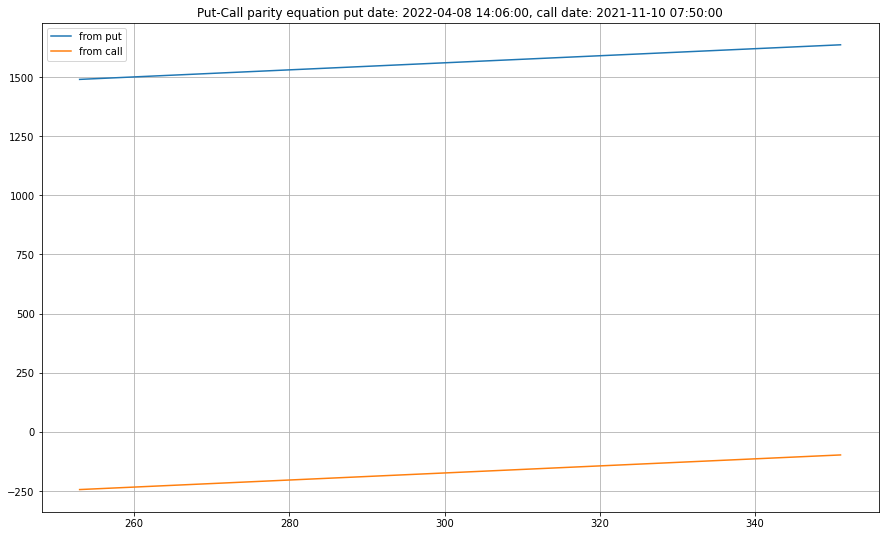

954.4231719455688
Intercept: 990.5521982636428, Index: 1.4936081975008746
579.0903824862744
Intercept: 615.5388208271219, Index: 1.4938140042165793


<Figure size 432x288 with 0 Axes>

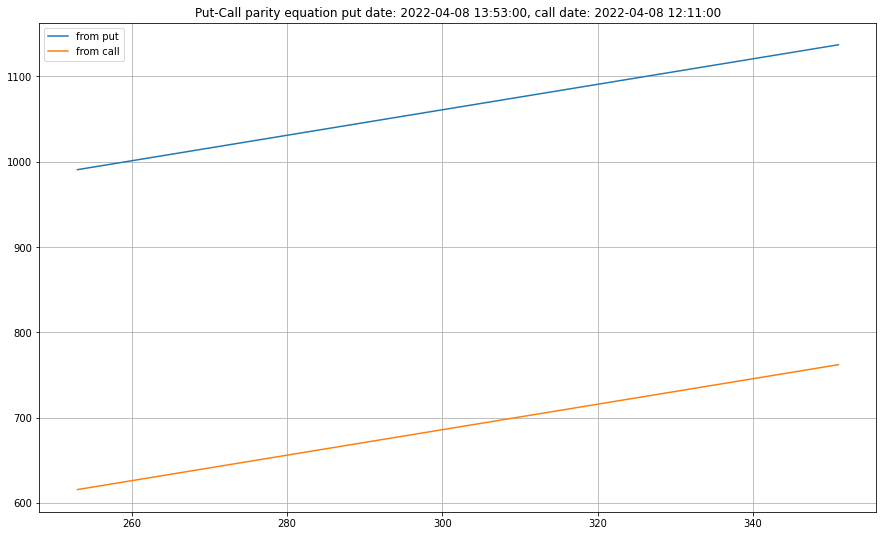

<Figure size 432x288 with 0 Axes>

In [28]:
for i in range(5):
    # Puts C0 - P0 = S0 - K / (1 + r)
    K = puts_sorted['Strike'].iloc[i]
    C0_P0 = S0 - K / (1 + r_forecast[-1])

    print(C0_P0[0])

    CT_PT = ST[-days_left + 1:] - K
    C_P = np.concatenate((C0_P0, CT_PT))

    x = np.arange(len(C_P))

    C_P_linr_puts = linear_regression(x=x, y=C_P, offset=days_left)

    # Calls C0 - P0 = S0 - K / (1 + r)
    K = calls_sorted['Strike'].iloc[i]

    C0_P0 = S0 - K / (1 + r_forecast[-1])

    print(C0_P0[0])

    CT_PT = ST[-days_left + 1:] - K
    C_P = np.concatenate((C0_P0, CT_PT))

    x = np.arange(len(C_P))

    C_P_linr_calls = linear_regression(x=x, y=C_P, offset=days_left)


    put_time = puts_sorted['Last Trade Date'][i]
    call_time = calls_sorted['Last Trade Date'][i]
    plt.figure(figsize=(15, 9))
    plt.plot(range(n, n + len(C_P_linr_puts)), C_P_linr_puts, label='from put')
    plt.plot(range(n, n + len(C_P_linr_calls)), C_P_linr_calls, label='from call')
    plt.title(f'Put-Call parity equation put date: {put_time}, call date: {call_time}')
    plt.legend()
    plt.grid()
    plt.show()
    plt.savefig(f'../Images/{put_time}_{call_time}.png', dpi=800)